In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def compute_errors(y,ypred):
    mse = np.mean((y - y_pred)**2)
    return mse

# Question 1 (additional)

Apply scikit learn model for Simple Linear regression using SGD of the given Salary_Data.csv dataset, and arrive at different values of B0, B1 and error for varying iterations.  Plot the graph of epoch(X-axis) versus error(Y-axis).

1th Epoch: Weight=1.2894 Bias=0.3771 Cost=0.4329
2th Epoch: Weight=1.4122 Bias=0.4052 Cost=0.2565
3th Epoch: Weight=1.4251 Bias=0.3978 Cost=0.2543
4th Epoch: Weight=1.4292 Bias=0.3878 Cost=0.2534
Final Weight=1.4295 Bias=0.3870
Final Error:0.25337287539152836


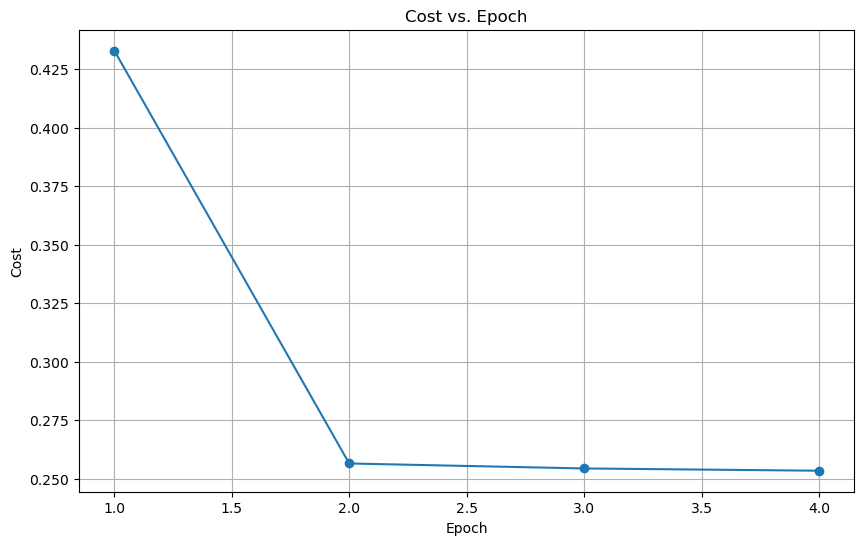

In [57]:
data={'Salary':[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2],
     'Experience':[1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]}

df=pd.DataFrame(data)
X=df['Experience'].values
y=df['Salary'].values


learningrate=0.01
iterations=48

weight,bias=0.1,0.001
n=float(len(X))
costs=[]
weights=[]

for i in range(iterations):
    y_pred=bias+weight*X
    cost=compute_errors(y,y_pred)
    if (i+1)%12==0 and i!=0:
        
        costs.append(cost)
        weights.append(weight)
        print(f"{i//12+1}th Epoch: Weight={weight:.4f} Bias={bias:.4f} Cost={cost:.4f}")
        
    weight_derivative=-(2/n)*sum(X*(y-y_pred))
    bias_derivative=-(2/n)*sum(y-y_pred)
    weight=weight-(learningrate*weight_derivative)
    bias=bias-(learningrate*bias_derivative)

print(f"Final Weight={weight:.4f} Bias={bias:.4f}")
iterations_range = range(1, len(costs) + 1)
print(f"Final Error:{costs[-1]}")
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, costs,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.grid(True)
plt.show()



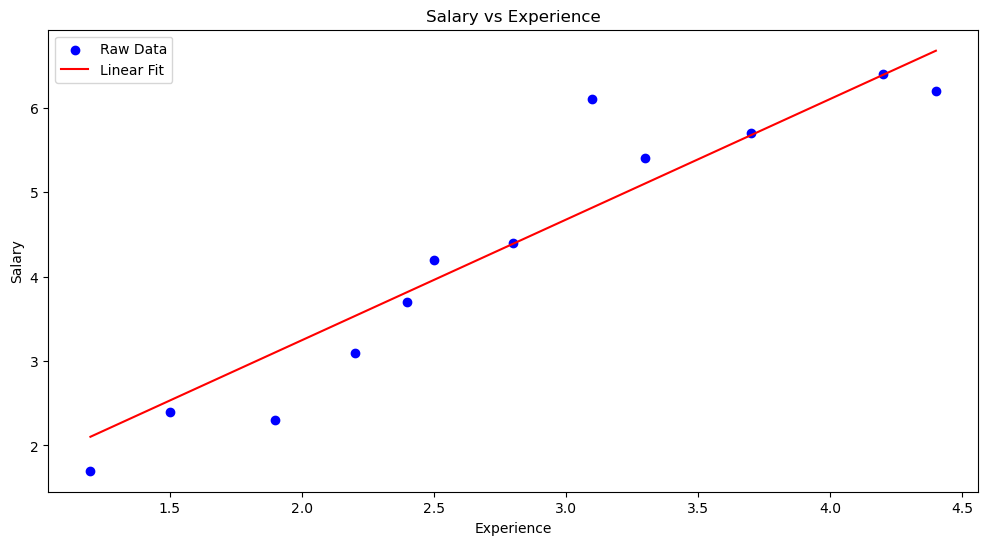

In [58]:
y_pred=bias+weight*X


plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='blue', label='Raw Data')

plt.plot(X, y_pred, color='red', label='Linear Fit')

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()
plt.show()

# Question 2 Additional

Consider positive and negative slope dataset given below. Apply 	logistic regression with gradient descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph of slope(x-axis) vs  log-loss (y-axis) for both case separately. 

x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])  # Positive slope

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 0, 0, 0])  # Negative slope

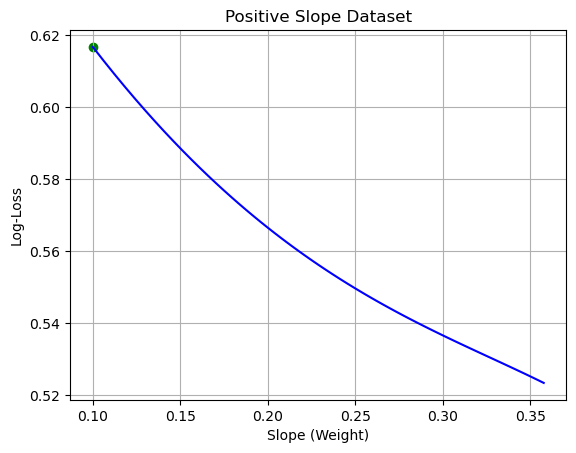

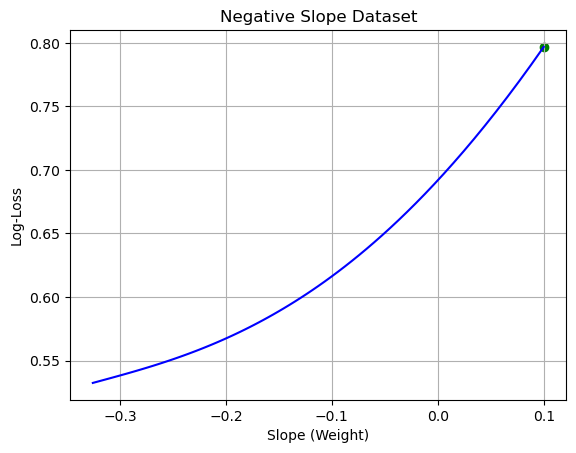

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_logistic_cost(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def logistic_regression_gradient_descent(X, y, learningrate=0.01, iterations=100):
    weight, bias = 0.1, 0
    n = float(len(X))
    costs = []
    weights = []

    for i in range(iterations):
        y_pred = sigmoid(bias + weight * X)
        cost = compute_logistic_cost(y, y_pred)
        costs.append(cost)
        weights.append(weight)
        
        weight_derivative = -(1/n) * np.sum(X * (y - y_pred))
        bias_derivative = -(1/n) * np.sum(y - y_pred)
        weight -= learningrate * weight_derivative
        bias -= learningrate * bias_derivative
    
    return weights,bias, costs

x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])  # Positive slope

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])  # Negative slope

weights_pos,bias_pos, costs_pos = logistic_regression_gradient_descent(x_pos, y_pos)
weights_neg,bias_neg, costs_neg = logistic_regression_gradient_descent(x_neg, y_neg)


plt.plot(weights_pos, costs_pos,  linestyle='-', color='b')
plt.scatter(weights_pos[0],costs_pos[0],color='g')
plt.xlabel('Slope (Weight)')
plt.ylabel('Log-Loss')
plt.title('Positive Slope Dataset')
plt.grid(True)
plt.show()

plt.plot(weights_neg, costs_neg, linestyle='-', color='b')
plt.scatter(weights_neg[0],costs_neg[0],color='g')
plt.xlabel('Slope (Weight)')
plt.ylabel('Log-Loss')
plt.title('Negative Slope Dataset')
plt.grid(True)

plt.show()


# Question 3

Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with  exerience in x-axis and salary in y axis. 
a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case. 
b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE). 
c. Try with different values of intercept for slope beta  between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).
d. Use the scikit learn and compare the results of MSE.

MSE values for slopes [0.1, 1.5, 0.8]: [10.81115, 1.1404166666666662, 1.762599999999999]


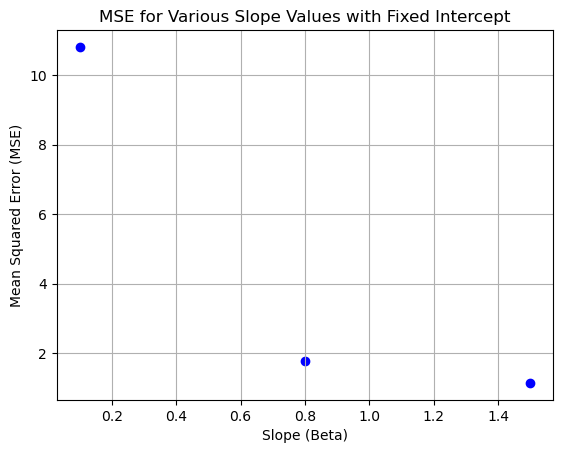

In [103]:
data = {
    'Salary': [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2],
    'Experience': [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
}

df = pd.DataFrame(data)
X = df['Experience'].values
y = df['Salary'].values

def compute_mse(beta, intercept, X, y):
    y_pred = beta * X + intercept
    mse = np.mean((y - y_pred)**2)
    return mse

#a
intercept = 1.1

betas = [0.1, 1.5, 0.8]

mse_values = [compute_mse(beta, intercept, X, y) for beta in betas]

print(f"MSE values for slopes {betas}: {mse_values}")

plt.figure(figsize=(8, 5))
plt.scatter(betas, mse_values, color='b')
plt.xlabel('Slope (Beta)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Various Slope Values with Fixed Intercept')
plt.grid(True)
plt.show()


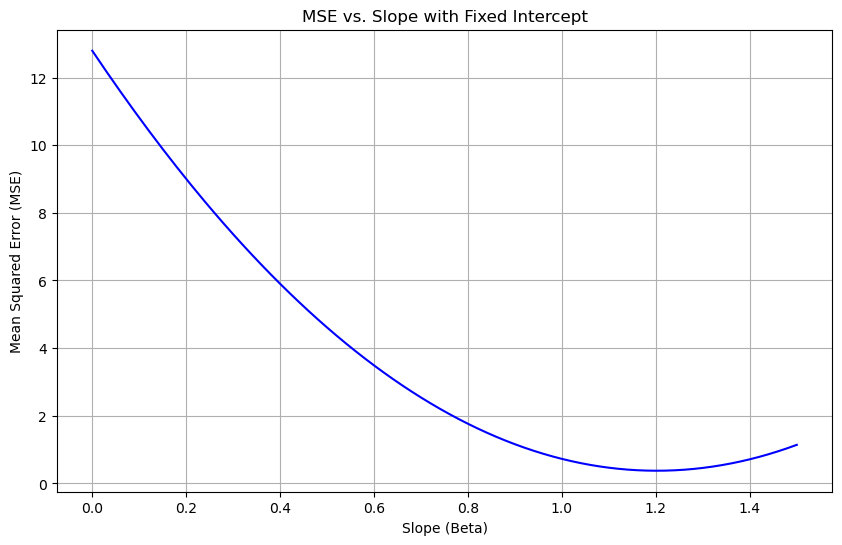

In [111]:
#b
beta_values = np.arange(0, 1.51, 0.01)
intercept = 1.1

mse_values = [compute_mse(beta, intercept, X, y) for beta in beta_values]

plt.figure(figsize=(10, 6))
plt.plot(beta_values, mse_values, linestyle='-', color='b')
plt.xlabel('Slope (Beta)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Slope with Fixed Intercept')
plt.grid(True)
plt.show()


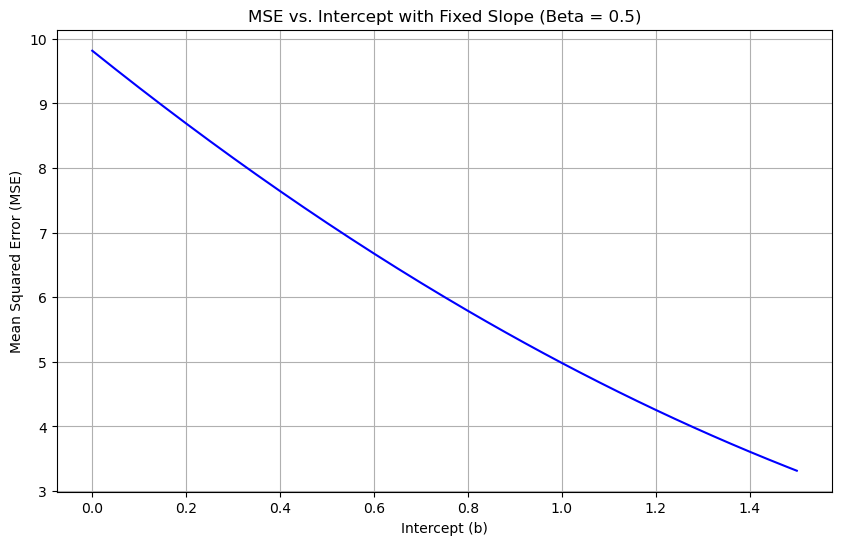

In [109]:
#c
beta = 0.5

intercept_values = np.arange(0, 1.51, 0.01)

mse_values = [compute_mse(beta, intercept, X, y) for intercept in intercept_values]

plt.figure(figsize=(10, 6))
plt.plot(intercept_values, mse_values,color='b')
plt.xlabel('Intercept (b)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Intercept with Fixed Slope (Beta = 0.5)')
plt.grid(True)
plt.show()


In [120]:
from sklearn.linear_model import LinearRegression
def compute_mserror(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

model = LinearRegression()
X_reshape = X.reshape(-1, 1)
model.fit(X_reshape, y)

y_pred_sklearn = model.predict(X_reshape)

mse_sklearn = compute_mserror(y, y_pred_sklearn)

print(f"Scikit-learn Coefficients:\nSlope (Beta): {model.coef_[0]}\nIntercept (b): {model.intercept_}")
print(f"Scikit-learn MSE: {mse_sklearn}")


Scikit-learn Coefficients:
Slope (Beta): 1.567098293113596
Intercept (b): -0.035638610947616556
Scikit-learn MSE: 0.23366710810280558


# Question 4

Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs. 
a. Plot the graph of log loss/error versus iteration.  
b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.
c. Plot the graph between beta (X-axis)  and log loss/ error (Y-axis)  using scikit learn and your approach separately.  
d. Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of .both cases.


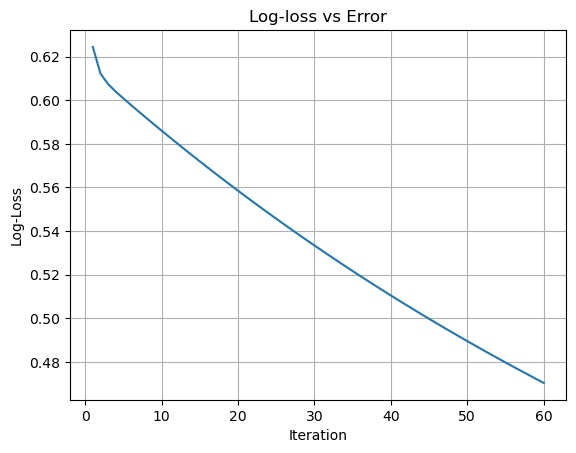

Final Weight (Beta): 0.33528015279141044
Final Bias (B0): -0.9015198980823665
Final Error: 0.47031696788879646


In [139]:
data = {'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8], 
        'Pass': [0, 0, 0, 0, 1, 1, 1, 1]}
df = pd.DataFrame(data)

X = df['Hours Studied'].values
y = df['Pass'].values

weights,bias,costs=logistic_regression_gradient_descent(X, y,0.1,60)

iterations_range = range(1, len(costs) + 1)
plt.plot(iterations_range,costs,)
plt.xlabel('Iteration')
plt.ylabel('Log-Loss')
plt.title('Log-loss vs Error')
plt.grid(True)
plt.show()
print(f"Final Weight (Beta): {weights[-1]}")
print(f"Final Bias (B0): {bias}")
print(f"Final Error: {costs[-1]}")

In [135]:
model = LogisticRegression(max_iter=60, solver='lbfgs')
X_reshape = X.reshape(-1, 1)  # Reshape X for sklearn
model.fit(X_reshape, y)


y_pred_sklearn = model.predict_proba(X_reshape)[:, 1]
log_loss_sklearn = compute_logistic_cost(y, y_pred_sklearn)


print(f"Scikit-learn Coefficients:\nSlope (Beta): {model.coef_[0][0]}\nIntercept (B0): {model.intercept_[0]}")
print(f"Scikit-learn Log Loss: {log_loss_sklearn}")


Scikit-learn Coefficients:
Slope (Beta): 1.1697993675705605
Intercept (B0): -5.264107913297968
Scikit-learn Log Loss: 0.1678061314011558


# Question 5

Consider positive and negative slope dataset given below. Apply simple linear regression with gradient descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph of slope(x-axis) vs  MSE (y-axis) for both case separately. 
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])  # Positive slope

x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 8, 6, 4, 2])  # Negative slope

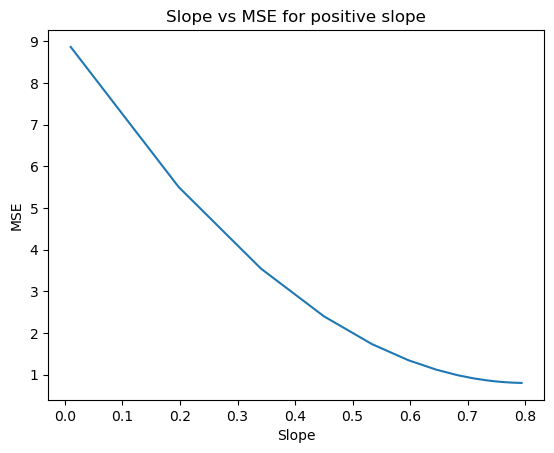

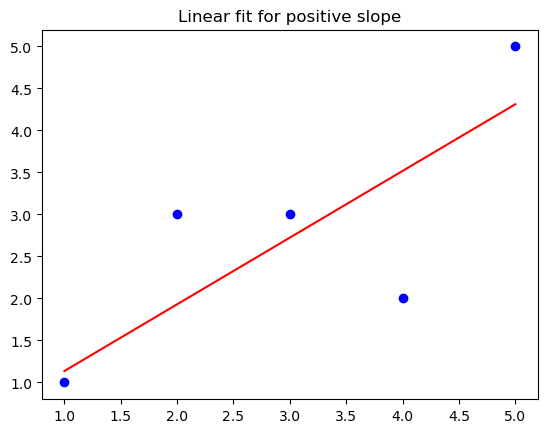

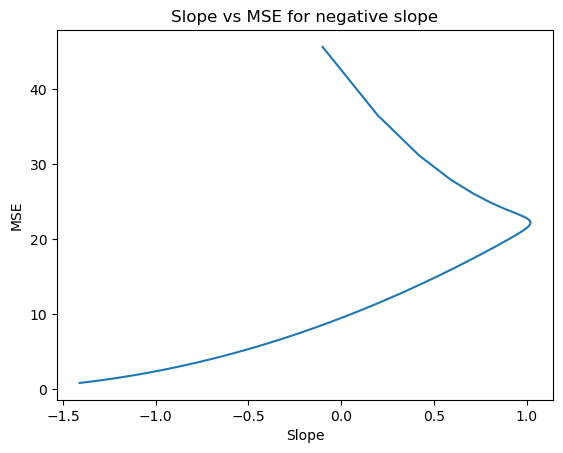

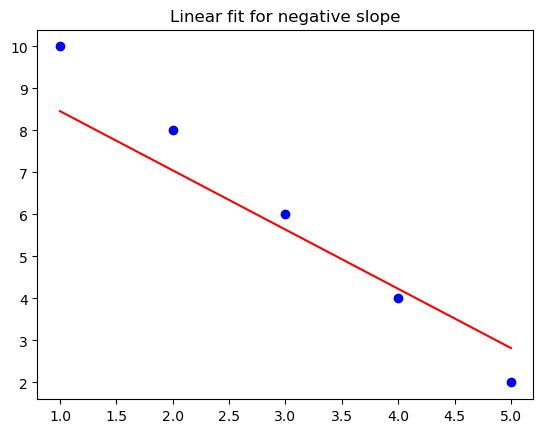

In [143]:
def gradient_descent(iter,learning_rate,b0,b1,x,y):

    errors = []
    slopes = []
    n=len(x)
    for i in range(iter) :
        y_pred = b0 + b1 * x
        error = y_pred-y
        mse = np.mean(error**2)
        errors.append(mse)
        slopes.append(b1)
        b0 -= learning_rate * (2/n) * np.sum(error)
        b1 -= learning_rate * (2/n) * np.sum(error * x)
    return errors,slopes,y_pred


x_pos = np.array([1,2,3,4,5])
y_pos = np.array([1,3,3,2,5])
pos_errors,pos_slopes,pos_y_pred = gradient_descent(20,0.01,0.1,0.01,x_pos,y_pos)
pos_errors

plt.plot(pos_slopes,pos_errors)
plt.title("Slope vs MSE for positive slope")
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.show()
 
plt.scatter(x_pos,y_pos,color='b')
plt.plot(x_pos,pos_y_pred,color='r')
plt.title("Linear fit for positive slope")
plt.show()

x_neg = np.array([1,2,3,4,5])
y_neg = np.array([10,8,6,4,2])
neg_errors,neg_slopes,neg_y_pred = gradient_descent(500,0.01,0.1,-0.1,x_neg,y_neg)
neg_errors

plt.plot(neg_slopes,neg_errors)
plt.title("Slope vs MSE for negative slope")
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.show()

plt.scatter(x_neg,y_neg,color='b')
plt.plot(x_neg,neg_y_pred,color='r')
plt.title("Linear fit for negative slope")
plt.show()